#### Постановка задачи
Adding Exits to a Maze (добавление выходов в лабиринт).

Для неориентированного графа с n вершинами и m ребрами вычислить число компонент связности.

#### Формат входных данных
Неориентированный граф с <i>n</i> вершинами и <i>m</i> ребрами. Следующие строки содержат две вершины <i>u</i> и <i>v</i> графа

#### Ограничения
m <= 10^3
n <= 10^3

#### Формат выходных данных

Одно целое число, обозначающее количество компонент связности в графе, описанным файлом входных данных.

In [17]:
import io
from IPython.display import display
import fileupload

fin = ''; # Здесь будет название файла, в котором будут тесты
# В данной ячейке представлен код для создания и отображения виджета
# Создание виджета для загрузки файла, в которых находятся тесты
_upload_widget = fileupload.FileUploadWidget()

# Функция обратного вызова для виджета загрузки файла
def _cb(change):
    global fin
    decoded = io.StringIO(change['owner'].data.decode('utf-8'))
    fin = change['owner'].filename
    print('Uploaded `{}` ({:.2f} kB)'.format(fin, len(decoded.read()) / 2 **10))

_upload_widget.observe(_cb, names='data')
display(_upload_widget) # Отображение виджета

Uploaded `01.in` (0.01 kB)


#### Инициализация

Считывание файла, в котором граф представлен в виде списка ребёр с заданным количеством вершин.
Также созданим объект графа graphviz'a, который необходим для визуализации графа (с количеством вершин не более 100).

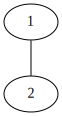

In [18]:
import problem3.main as p3 # Модуль с реализованными алгоритмами
import graphviz as gv

# Считывание строк из файла
f = open("tests/" + fin, "r")
lines = [ line for line in f ]

n, m = lines[0].split()
n = int(n)
m = int(m)

# Graph - функция graphviz'a, которая создает объект граф
dot = gv.Graph(comment = "test")

# Добавление узлов
for v in range(1, n + 1):
    dot.node(str(v))

# Добавление ребер    
for i in range(1, m + 1):
    u, v = lines[i].split()
    dot.edge(u, v)

# Визуализация графа
dot

#### Решение

Инициализация и запуск алгоритма решения.
Вывод количества компонент связности.

#### Алгоритм

Идея:
1. Запускаем DFS для каждой непомеченной вершины (В начальный момент времени все вершины непомечены).
2. Таким образом после работы DFS'a от заданной вершины, все вершины данной компоненты связности будут помечены.
3. Увеличиваем счётчик на 1 (count).
4. Повторяем 1-3 для каждой вершины.
5. count - количество компонент связности.

In [19]:
G = p3.graph_init(lines, n, m) # Инициализация графа. G - граф
components_count = p3.solve(G) # solve возвращает количество компонент связности, работает на dfs
print(components_count) # Вывод количества компонент связности

time:  4.105475682081305e-06
1


#### Код:

In [4]:
from IPython.display import FileLink, FileLinks
FileLink('problem3/main.py')

C:\Users\Misha\Desktop\maze\problem3\main.py

#### Тестирование
Работоспособность алгоритма проверена на 13 тестах.

##### Тест 1
Простой граф из 2 вершин и 1 ребра.
1 компонента связности

##### Тест 2
Простой граф из 3 вершин и 2 рёбер между ними.
1 компонента связности

##### Тест 3
Несвязный граф из 2 компонент связности. 
7 вершин. 6 рёбер.


##### Тест 4
Связный граф из 7 вершин и 6 рёбер. 

##### Тест 5
Усложнённое дерево. Связный граф из 8 вершин и 7 рёбер.

##### Тест 6
Несвязный граф из 15 вершин и 13 ребёр. Одна вершина отдельная компонента связности.
Всего 2 компонены связности.

##### Тест 7
Усложнённый тест 6. Добавлена новая компонента связности.
18 вершин. 15 рёбер.

##### Тест 8
Связный граф. 11 вершин. 10 рёбер. 
Другая структура графа.

##### Тест 9
Связный граф. 7 вершин. 6 рёбер. 
Изменённое дерево.

##### Тест 10
Сложный тест. 1000 вершин. 957 рёбер.
Время работы: ~0.00127 сек.
193 компоненты связности.

##### Тест 11
Сложный тест. 1000 вершин. 1000 рёбер.
Время работы: ~0.00157 сек.
164 компоненты связности.

##### Тест 12
Сложный тест. 776 вершин. 1000 рёбер.
Время работы: ~0.00119 сек.
62 компоненты связности.

##### Тест 13
Сложный тест "Змейка". 1000 вершин. 999 рёбер.
Время работы: 0.002802 сек.
1 компонента связности.
Путь существует.